Mean Squared Error on Test Set: 0.5245146178314738


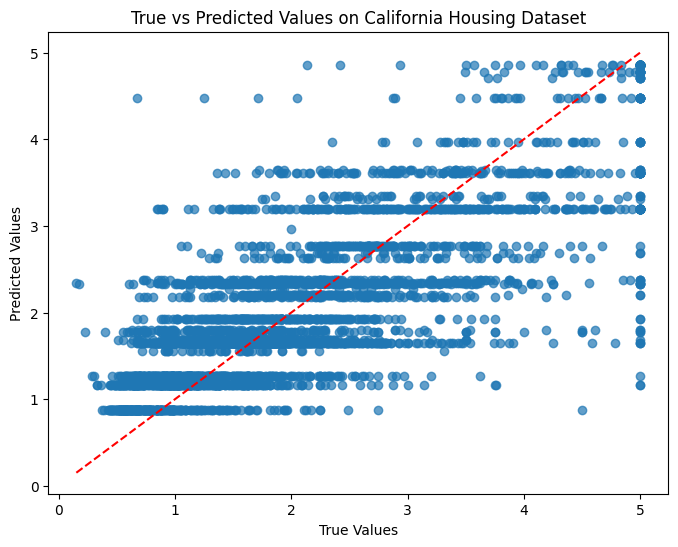

In [3]:
#@title Regression Tree from Scratch on California Housing Dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Node class to represent a tree node
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index  # Index of feature to split on
        self.threshold = threshold          # Threshold value for splitting
        self.left = left                    # Left child node (for samples <= threshold)
        self.right = right                  # Right child node (for samples > threshold)
        self.value = value                  # Prediction value for leaf nodes

def calculate_mse(y):
    """Calculate Mean Squared Error for a set of target values."""
    if len(y) == 0:
        return 0
    mean = np.mean(y)
    return np.mean((y - mean) ** 2)

def best_split(X, y, min_samples_split):
    """
    Find the best split for dataset (X, y) based on minimizing the MSE.

    Returns:
        best_index: Feature index on which to split.
        best_threshold: Threshold value for the split.
        best_left_idx: Indices of samples in the left split.
        best_right_idx: Indices of samples in the right split.
    """
    m, n = X.shape
    if m < min_samples_split:
        return None, None, None, None

    best_mse = float('inf')
    best_index = None
    best_threshold = None
    best_left_idx = None
    best_right_idx = None

    # Try every feature and every unique threshold for that feature
    for feature_index in range(n):
        X_feature = X[:, feature_index]
        thresholds = np.unique(X_feature)
        for threshold in thresholds:
            left_idx = np.where(X_feature <= threshold)[0]
            right_idx = np.where(X_feature > threshold)[0]

            # Check if the split is valid
            if len(left_idx) < min_samples_split or len(right_idx) < min_samples_split:
                continue

            mse_left = calculate_mse(y[left_idx])
            mse_right = calculate_mse(y[right_idx])
            mse_total = (len(left_idx) * mse_left + len(right_idx) * mse_right) / m

            if mse_total < best_mse:
                best_mse = mse_total
                best_index = feature_index
                best_threshold = threshold
                best_left_idx = left_idx
                best_right_idx = right_idx

    return best_index, best_threshold, best_left_idx, best_right_idx

class DecisionTreeRegressor:
    def __init__(self, max_depth=float("inf"), min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        """Build the regression tree using the training data."""
        self.root = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        num_samples, num_features = X.shape

        # Stopping criteria: max depth reached or too few samples to split
        if depth >= self.max_depth or num_samples < self.min_samples_split:
            leaf_value = np.mean(y)
            return Node(value=leaf_value)

        best_feat, best_thresh, left_idx, right_idx = best_split(X, y, self.min_samples_split)
        if best_feat is None:
            leaf_value = np.mean(y)
            return Node(value=leaf_value)

        # Recursively build the left and right subtrees
        left_subtree = self._build_tree(X[left_idx, :], y[left_idx], depth + 1)
        right_subtree = self._build_tree(X[right_idx, :], y[right_idx], depth + 1)
        return Node(feature_index=best_feat, threshold=best_thresh,
                    left=left_subtree, right=right_subtree)

    def _predict_sample(self, x, node):
        """Traverse the tree to predict the value for a single sample."""
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._predict_sample(x, node.left)
        else:
            return self._predict_sample(x, node.right)

    def predict(self, X):
        """Predict target values for all samples in X."""
        return np.array([self._predict_sample(sample, self.root) for sample in X])

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the regression tree
tree = DecisionTreeRegressor(max_depth=5, min_samples_split=10)
tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

# Plot True vs Predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values on California Housing Dataset")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


In [4]:
# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

# Evaluate the model using the R² Score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score on Test Set:", r2)


Mean Squared Error on Test Set: 0.5245146178314738
R² Score on Test Set: 0.5997321244428704
